In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("intrusion.csv")

In [3]:
dataset.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.126061,-0.645384,0.753021,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,normal
1,2.215916,0.768925,0.753021,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,normal
2,-0.126061,1.090360,-0.739924,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,anomaly
3,-0.126061,-0.452524,0.753021,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,normal
4,-0.126061,-0.452524,0.753021,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,...,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,normal


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25192 non-null  float64
 1   service                      25192 non-null  float64
 2   flag                         25192 non-null  float64
 3   duration                     25192 non-null  float64
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  float64
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 non-null  float64
 11  logged_in                    25192 non-null  float64
 12  num_compromised              25192 non-null  float64
 13  root_shell      

In [5]:
features = dataset.drop('class', axis = 1)

In [6]:
features = features[['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'logged_in',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']]


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25192 non-null  float64
 1   service                      25192 non-null  float64
 2   flag                         25192 non-null  float64
 3   src_bytes                    25192 non-null  float64
 4   logged_in                    25192 non-null  float64
 5   serror_rate                  25192 non-null  float64
 6   srv_serror_rate              25192 non-null  float64
 7   same_srv_rate                25192 non-null  float64
 8   dst_host_srv_count           25192 non-null  float64
 9   dst_host_same_srv_rate       25192 non-null  float64
 10  dst_host_same_src_port_rate  25192 non-null  float64
 11  dst_host_serror_rate         25192 non-null  float64
 12  dst_host_srv_serror_rate     25192 non-null  float64
 13  dst_host_rerror_

In [8]:
from sklearn import ensemble

In [9]:
our_anomaly_detector = ensemble.IsolationForest(random_state=42)
our_anomaly_detector.fit(features)

training_predictions = our_anomaly_detector.predict(features)
print(len(training_predictions))

25192


In [10]:
outlier_label = []
outlier_label = list(training_predictions)

In [11]:
#print(outlier_label)

In [12]:
print(outlier_label.count(-1))

4890


In [13]:
c = 0
end = 25192
for i in range(0,end):
    if dataset['class'][i] == 'anomaly' and outlier_label[i] == -1:
        c += 1
    
print(c)

2968


In [14]:
q = 0
while q < len(outlier_label):
    if outlier_label[q] == -1:
        #print(q)
        dataset.drop(q,axis=0,inplace =True)
    q+=1

In [15]:
#new = dataset.to_csv(r'C:\Users\muktadir\Desktop\Anomaly Detection Comparison(THAI)\New folder\Isolation\isolation(final).csv',encoding='utf-8',index=False)

In [16]:
dataset = pd.read_csv('Train_data.csv')

In [17]:
['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'logged_in',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'logged_in',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

Text(0, 0.5, 'dst_host_srv_count')

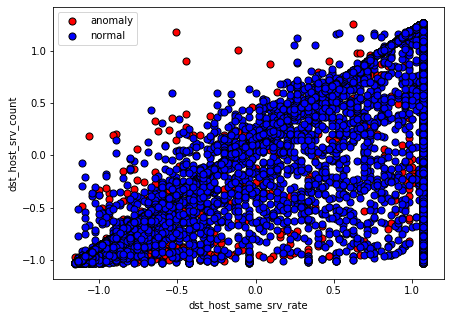

In [20]:
outlier_label = np.array(outlier_label)
#print(outlier_label)
outlier_label = outlier_label.reshape(1,end)
plt.figure(figsize=(7,5))
plt.scatter(features[outlier_label[0] == -1].dst_host_same_srv_rate,
            features[outlier_label[0] == -1].dst_host_srv_count,
            s=50,
            c='red',
            marker='o',
            edgecolors= 'black',
           label = 'anomaly')

plt.scatter(features[outlier_label[0] == 1].dst_host_same_srv_rate,
            features[outlier_label[0] == 1].dst_host_srv_count,
            s=50,
            c='blue',
            marker='o',
            edgecolors= 'black',
            label='normal')

plt.legend(loc = 'upper left')
plt.xlabel('dst_host_same_srv_rate')
plt.ylabel('dst_host_srv_count')
#plt.savefig('K=2.png')